# Confusers

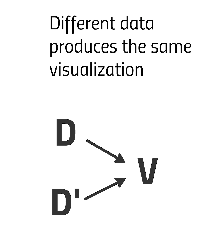

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import cm
%matplotlib inline
conf = plt.imread('confuser.png')
plt.axis('off')
plt.imshow(conf)

## Generate two random data frames (x, y, z, label)
### Same floating point value, but tuples are swizzled in z

In [2]:
data = []
data1 = []
for i in range(100):
    r = np.random.ranf(4)
    label = 'a' if np.random.ranf() < .5 else 'b'
    data.append([r[0], .9, r[1], label])
    data.append([r[2], .9, r[3], label])
    data1.append([r[0], .9, r[3], label])
    data1.append([r[2], .9, r[1], label])

df = pd.DataFrame(data)
df.columns = ['x', 'y', 'z', 'class']
df1 = pd.DataFrame(data1)
df1.columns = ['x', 'y', 'z', 'class']

# verify all data vectors differ in z

In [3]:
(df != df1).all()

x        False
y        False
z         True
class    False
dtype: bool

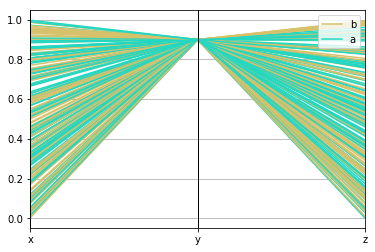

In [4]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(df, class_column='class')
plt.savefig('c.png')

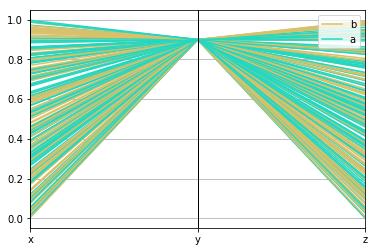

In [5]:
parallel_coordinates(df1, class_column='class')
plt.savefig('c1.png')

## reorder columns to shift degeneracy

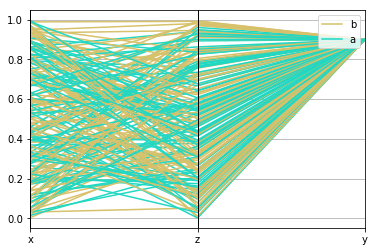

In [6]:
parallel_coordinates(df[['x', 'z', 'y', 'class']], class_column='class')
plt.savefig('cf.png')

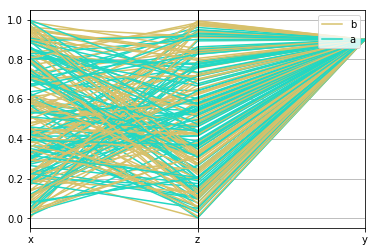

In [7]:
parallel_coordinates(df1[['x', 'z', 'y', 'class']], class_column='class')
plt.savefig('cf1.png')

## blink comparator (with confusion)

<IPython.core.display.Javascript object>


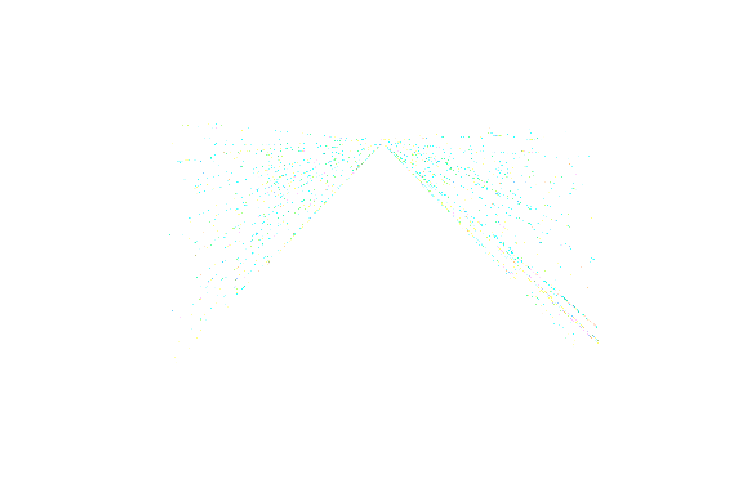

In [8]:
%matplotlib nbagg
%matplotlib qt
from matplotlib import animation
img = plt.imread('c.png')
img1 = plt.imread('c1.png')
bfig = plt.figure()
blink = animation.ArtistAnimation(bfig, [[plt.imshow(img)], [plt.imshow(img1)]], blit=True, repeat_delay=0, interval=1000)
plt.axis('off')
plt.show()

## diff visualizations

In [9]:
img = plt.imread('c.png')
img1 = plt.imread('c1.png')
diff = np.copy(img)
for t,v in np.ndenumerate(img):
    x,y,z = t
    v2 = img1[x][y][z]
    if v != v2:
        diff[x][y][z] = (v + v2)/2
    else:
        diff[x][y][z] = 1
        
plt.axis('off')
plt.imshow(diff)

## blink comparator on reordered columns (no confusion)

<IPython.core.display.Javascript object>


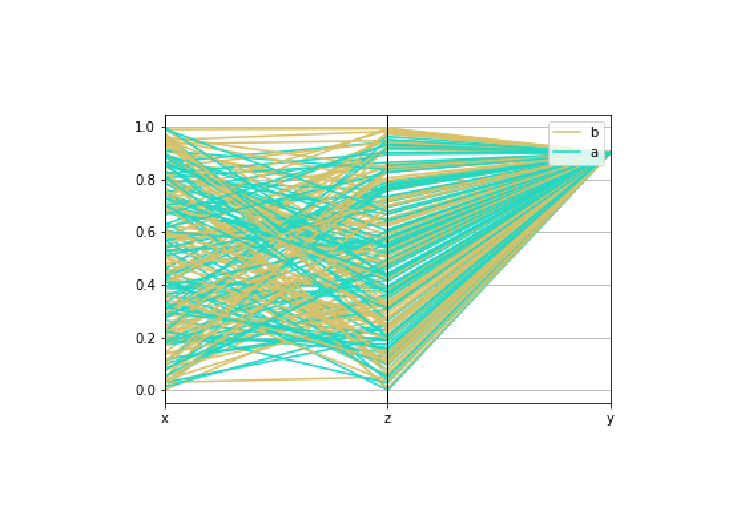

In [10]:
bfig = plt.figure()
img = plt.imread('cf.png')
img1 = plt.imread('cf1.png')
blink = animation.ArtistAnimation(bfig, [[plt.imshow(img)], [plt.imshow(img1)]], blit=True, repeat_delay=0, interval=1000)
plt.axis('off')
plt.show()